In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.4MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [14]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels ='inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels ='inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
#normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
# create CNN

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 56s 88ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 1.4790 - val_accuracy: 0.7922
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 1.7751 - val_accuracy: 0.7884
Epoch 3/10
625/625 [==============================] - 54s 87ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 1.3923 - val_accuracy: 0.7976
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0210 - accuracy: 0.9937 - val_loss: 1.5482 - val_accuracy: 0.7922
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0223 - accuracy: 0.9937 - val_loss: 1.4967 - val_accuracy: 0.7882
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 1.5574 - val_accuracy: 0.7876
Epoch 7/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 1.5140 - val_accuracy:

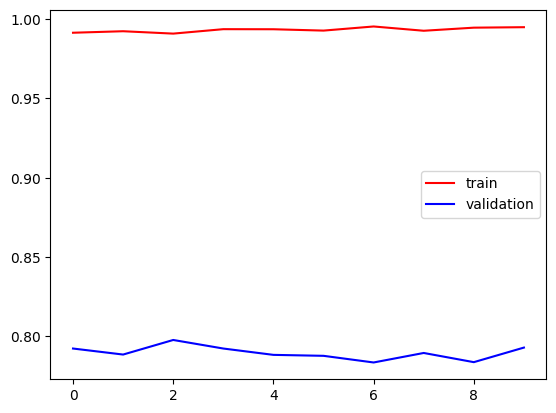

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [26]:
import cv2

In [27]:
test_img = cv2.imread('/content/Cat.jpg')

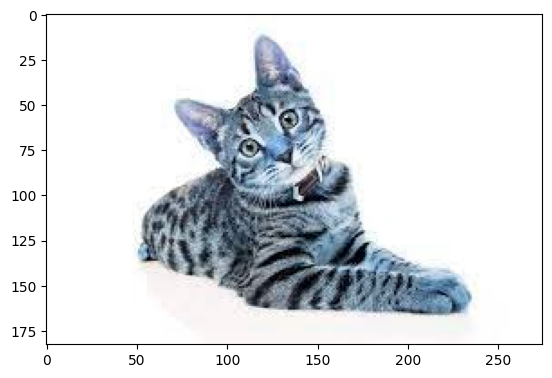

In [28]:
plt.imshow(test_img)

In [29]:
test_img1 = cv2.imread('/content/Dog.jpg')

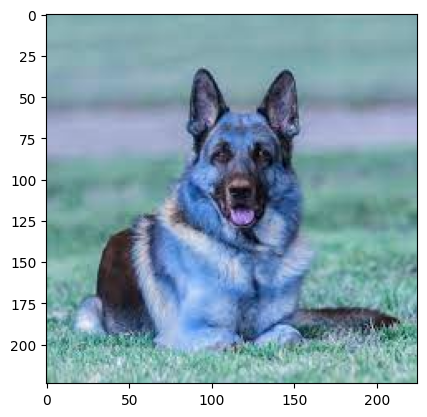

In [30]:
plt.imshow(test_img1)